In [1]:
import cv2
import pystegano
import os
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Documentation
help(pystegano.lsb)

Help on class lsb in module pystegano.pystegano:

class lsb(builtins.object)
 |  Steganographic tools based on least significant bit (lsb).
 |  
 |  Methods defined here:
 |  
 |  decode(image)
 |      Retrives a secret_message (string) from an image (image) using lsb steganography.
 |  
 |  encode(cover_image, secret_message)
 |      Stores a secret_message (string) into a cover_image (image) using lsb steganography.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [3]:
# Generate Lorem Ipsum text
def random_message():
    response = requests.get("http://loripsum.net/api/1/headers/plaintext")
    if response.status_code == 200:
        secret_msg = response.text
    else:
        # Default secret message, when requests fail
        secret_msg = "Hello There!"
    return secret_msg

In [4]:
# Set directory of cover images
cover_dirname = "C:/Users/PC/Masters Files/SteganographyDetection/Datasets/Dataset Cover Images"
# Set working directory
dirname = "C:/Users/PC/Masters Files/SteganographyDetection/Datasets/Dataset LSB"

In [5]:
# Add stego payload
for i, filename in enumerate(os.listdir(cover_dirname)):
    cover_image = cv2.imread(cover_dirname + "/" + filename, cv2.IMREAD_UNCHANGED)
    secret_message = random_message()
    encoded_image = pystegano.lsb.encode(cover_image, secret_message)
    cv2.imwrite(dirname + "/LSB" + filename, encoded_image)

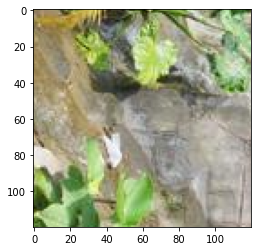

In [6]:
# Display the stego image
test_image = cv2.cvtColor(cv2.imread(dirname + "/LSB59.png"), cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
plt.show()

In [7]:
# Load stego image
stego_image = cv2.imread(dirname + "/LSB59.png", cv2.IMREAD_UNCHANGED)

In [8]:
# Attempt to decode the secret message
decoded_message = pystegano.lsb.decode(stego_image)

In [9]:
print(decoded_message)

Claudii libidini, qui tum erat summo ne imperio, dederetur.

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed tempus est, si videtur, et recta quidem ad me. Mihi, inquam, qui te id ipsum rogavi? Quis Pullum Numitorium Fregellanum, proditorem, quamquam rei publicae nostrae profuit, non odit? Duo Reges: constructio interrete. Quid est, quod ab ea absolvi et perfici debeat? Igitur neque stultorum quisquam beatus neque sapientium non beatus. Ego quoque, inquit, didicerim libentius si quid attuleris, quam te reprehenderim. Ita fit cum gravior, tum etiam splendidior oratio. 


